In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

In [3]:
n = 100 
r = 0.8
x0 = np.random.normal(size=n)
x1 = np.random.normal(loc=x0 * r, scale=(1 - r ** 2) ** 0.5)
y = np.random.normal(loc=x0 - x1)
x = np.vstack((x0, x1))

logp = -157.66, ||grad|| = 0.015328: 100%|████████████████████████████████████████████| 14/14 [00:00<00:00, 652.11it/s]
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [epsilon, beta, alpha]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 11000/11000 [00:16<00:00, 655.23draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E5C640A128>,
      dtype=object)

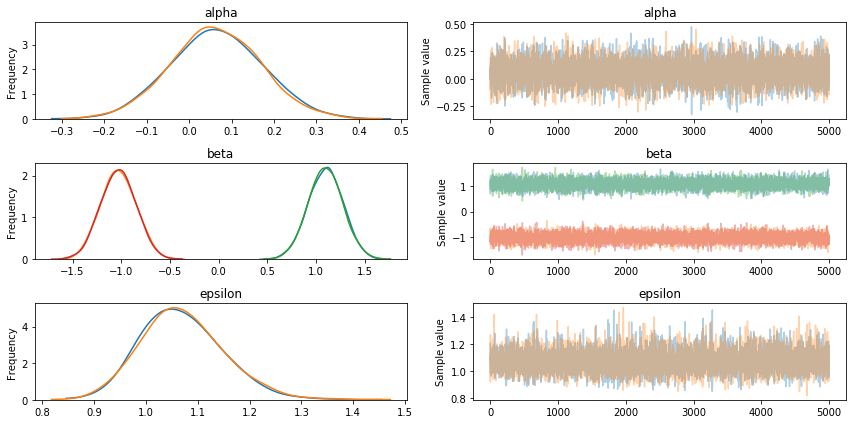

In [7]:
with pm.Model() as model_a:
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta = pm.Normal('beta', mu=0, sd=10, shape=2)
    epsilon = pm.HalfCauchy('epsilon', 5)
    
    mu = alpha + pm.math.dot(beta, x)
    
    y_pred = pm.Normal('y_pred', mu=mu, sd=epsilon, observed=y)
    
    start = pm.find_MAP()
    step = pm.NUTS()
    trace = pm.sample(5000, start=start, step=step)
    
pm.traceplot(trace)


GridSpec(1, 2, width_ratios=[3, 1])

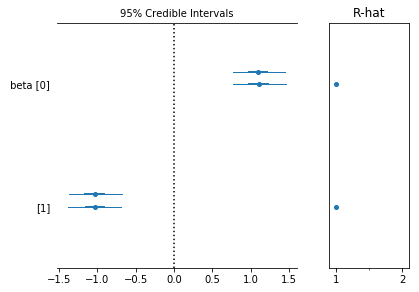

In [8]:
pm.forestplot(trace, varnames=['beta'])